In [6]:
import numpy as np
from scipy.signal import convolve2d
from tqdm import tqdm
import matplotlib.pyplot as plt

In [11]:
with open('input_day18.txt') as f:
    data = f.readlines()

In [12]:
grid = np.array([list(ele)[:-1] for ele in data])

In [13]:
x = np.ones((3,3))
x[1,1] = 0

In [14]:
vals = []
ivals = []
for i in tqdm(range(10000)):
    grid_trees = (grid=='|').astype(int)
    grid_mill = (grid=='#').astype(int)
    grid_open = (grid=='.').astype(int)
    ivals.append(i)
    vals.append(np.sum(grid_trees)*np.sum(grid_mill))
    
    num_trees = convolve2d(grid_trees, x, mode='same')
    num_mill = convolve2d(grid_mill, x, mode='same')
    num_open = convolve2d(grid_open, x, mode='same')
    #print("\n".join(["".join(ele) for ele in grid]))
    #print('\n')
    
    grid[np.where(grid_open & (num_trees >= 3))] = '|'

    grid[np.where(grid_trees & (num_mill >= 3))] = '#'
    grid[np.where(grid_mill & ((num_trees < 1) | (num_mill < 1)))] = '.'
    #print("\n".join(["".join(ele) for ele in grid]))
    
grid_trees = (grid=='|').astype(int)
grid_mill = (grid=='#').astype(int)
grid_open = (grid=='.').astype(int) 

print(np.sum(grid_trees)*np.sum(grid_mill))

100%|██████████| 10000/10000 [00:05<00:00, 1894.95it/s]

196726


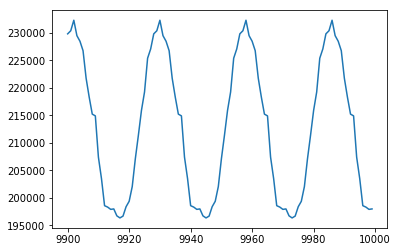

In [15]:
plt.plot(ivals[-100:], vals[-100:])

In [23]:
np.where(vals[-100:]==max(vals[-100:]))

(array([ 2, 30, 58, 86]),)

In [24]:
#we take advantage of the periodicity
vals[9900 + (1000000000 - 9900) % 28]

228490

In [22]:
ivals[9900]

9900

In [19]:
np.where(vals[-100:]==max(vals[-100:]))

(array([ 2, 30, 58, 86]),)

In [ ]:
num_trees

In [ ]:
exdata = ['.#.#...|#.', 
          '.....#|##|',
            '.|..|...#.',
            '..|#.....#',
            '#.#|||#|#|',
            '...#.||...',
            '.|....|...',
            '||...#|.#|',
            '|.||||..|.',
            '...#.|..|.']
exdata = np.array([list(ele) for ele in exdata])
grid = exdata

In [ ]:
num_mill

In [ ]:
(num_trees < 1) | (num_mill < 1)

In [ ]:
grid_mill & ((num_trees < 1) | (num_mill < 1))